# Data Mining Avancé

#### Sabri LAGHA   Said MALONGO    M2 ECO-STATS DARM


 ## Sujet: Data science pour la prédiction de vente sur les données de ventes immobilières de Lyon (2018 à 2022)
  
  




##  Contexte


Dans le cadre de ce projet, l'objectif principal était de mettre en place une situation d'échange avec
un client à la recherche d'une solution Data Science pour ses choix d'investissement immobilier.
Notre objectif est de mettre en place toute une démarche d'utilisation de l'analyse de données et de la science
des données pour l'analyse prédictive et l'aide à la décision.
Le cahier des charges de notre supposé client comprenait plusieurs enjeux :  
   
• Est-il plus rentable d'investir dans une maison ou un appartement ?  
• Comment anticiper sa valeur future ?  
• Quel quartier de la ville a le meilleur rapport prix ?  
• Comment observer les tendances d'évolution/baisse du prix du logement ?  
• Quelle est la valeur estimée de la propriété selon la valeur établie  

Ainsi,nous nous concentrerons sur deux pratiques en lien avec les méthodes demandées qui sont:  
- les techniques liées à la collecte de données(dans notre cas l'extraction de données à partir du web)  
- l'application de tâches métier à l'aide de technique d'apprentissage supervisé et/ou non supervisé.



# Création de la base de données initiale

## Collecte de données

Pour appliquer la collecte des données annuelles des ventes immobilières de Lyon et de ses 
arrondissements, deux principales solutions 
s'offraient à nous : de lignes à implémenter dans notre modèle (nous avons dû récupérer les 
données de ventes sur cinq ans). - de récupérer la totalité des ventes annuelles de la France 
entière pour ensuite effectuer un traitement informatique.
Nous avons opté pour la seconde solution par souci de praticité.


 ## Sélection des données de toutes les ventes en France

 Les données ont été directement récupérées sur le site "data.gouv.fr" qui présentait les 
métadonnées des ventes immobilières françaises annuelles sur les cinq dernières années.  
  
Nous devions trouver une solution pour stocker dans notre data-frame les ventes immobilières 
satisfaisant aux conditions  suivantes :  
- Ville(s) : Lyon et ses arrondissements 
- Période : de 2017 à 2022   
- Type de logement : Appartement ou Maison  
- Ne pas inclure les colonnes qui ne sont pas pertinentes pour les étapes d'analyse et de prédiction.  
   
A partir de ces conditions, la première étape de sélection des données a été réalisée à l'aide d'un  dictionnaire stockant les années avec l'URL correspondant à chaque table de ventes. Dans cet ordre :   
-une boucle for permet de parcourir la table des ventes de l'année en question.  
Une fois ce premier tri effectué, nous sommes passés de plusieurs millions de lignes de données à  150 000 lignes dans notre dataframe.  
-L'algorithme supprime les colonnes non pertinentes grâce à la méthode drop.  
-On ne garde que les lignes contenant la chaîne "Lyon".  
-On recherche les communes portant le terme "Lyon" mais qui ne font pas partie des villes sélectionnées 
(ex : Cognat-Lyonne, Lyon la Forêt) en créant une liste de ces villes puis en utilisant la méthode isin().   
-on ne garde que les lignes avec une valeur 
de 1 ou 2 dans la colonne type local afin de ne garder que les ventes d'appartements et de maisons (en  se référant à la notice liée aux métadonnées)    
-on supprime les lignes contenant des valeurs nulles.
  

En effet nous avons jugé qu'étant donné le peu de lignes contenant des valeurs nulles, il était plus judicieux pour nous de les supprimer plutôt que de leur associer des valeurs moyennes par colonnes afin de ne pas fausser la prédiction future. Cependant, nous pensons que nous aurions opéré différemment si le nombre de rangs n'avait pas été considérable.  
  
Une fois ce premier tri effectué, nous sommes passés de plusieurs millions de lignes de données à 
150 000 lignes dans notre dataframe.  
On finit par stocker la table dans un fichier csv qui servira de base à toutes les autres opérations.  
En fonction des analyses réalisées par la suite, nous déciderons d'implémenter de nouvelles 
méthodes dans notre fonction informatique pour ajuster notre base de données, ce qui réduira 
considérablement le nombre de lignes de notre table de données.





In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
#importer toutes les librairies utilisées dans ce notebook
url_dict = {
    '2022':'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt',
    '2021':'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-155828/valeursfoncieres-2021.txt',
    '2020':'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-161156/valeursfoncieres-2020.txt',
    '2019':'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-155101/valeursfoncieres-2019.txt',
    '2018':'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-154703/valeursfoncieres-2018.txt',
}
def collect():
  lyon_AY=[]
  for year,url in tqdm(url_dict.items()):
    print(f'----------STARTING YEAR {year}----------')
    data_ = pd.read_csv(url, sep="|")
    exclu=['COGNAT-LYONNE','LYONS LA FORET', 'BEAUFICEL-EN-LYONS','CHAZELLES SUR LYON','SAINTE FOY LES LYON', 'BEAUVOIR-EN-LYONS']
    data_2=data_[data_['Commune'].str.contains('LYON')]
    data_2 = data_2.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI',
                                      '3 Articles CGI','4 Articles CGI','5 Articles CGI','Identifiant local','No Volume','B/T/Q',
                                      'Surface Carrez du 1er lot','2eme lot','Surface Carrez du 2eme lot','3eme lot',
                                      'Surface Carrez du 3eme lot','4eme lot','Surface Carrez du 4eme lot','5eme lot',
                                      'Surface Carrez du 5eme lot','Nature culture','Nature culture speciale','Surface terrain',
                                      'Prefixe de section','Type de voie','Nombre de lots','1er lot','Code commune','Section','No plan','Code voie',
                                      'Code type local'], axis=1)
    data_2=data_2[np.logical_not(data_2.isin(exclu))]
    data_2=data_2[data_2['Commune'].notnull()]
    data_2['year']=year
    lyon_AY.append(data_2)
    del data_2
  df=pd.concat(lyon_AY)
  return df

df=collect()

  0%|          | 0/5 [00:00<?, ?it/s]

----------STARTING YEAR 2022----------


C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\2055456257.py:15: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


----------STARTING YEAR 2021----------


C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\2055456257.py:15: DtypeWarning: Columns (18,23,24,26,28,29,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


----------STARTING YEAR 2020----------


C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\2055456257.py:15: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


----------STARTING YEAR 2019----------


C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\2055456257.py:15: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


----------STARTING YEAR 2018----------


C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\2055456257.py:15: DtypeWarning: Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ = pd.read_csv(url, sep="|")


## Premières visualisations 

Les premières visualisations ont pour but de définir des lignes de données susceptibles de 
fausser les résultats de notre prédiction future.  
Pour cela, nous utilisons la librairie plotly pour représenter la valeur foncière des maisons en 
fonction de leurs années. Cela nous permet de dupliquer le nombre d'observations et de les comparer pour voir certaines anomalies.  
On remarque que par rapport à l'année 2012, les 4 autres années affichent des valeurs 
extrêmes pour des maisons jusqu'à plus de 25 millions d'euros, ce qui aurait pu être 
"éventuellement" réaliste si la surface et le nombre de pièces principales s'accordaient.
C'est dans cette perspective que la visualisation des données va nous permettre de déterminer 
de nouveaux traitements.
6.4 Premières visualisations
Le paramètre "hover data" nous a permis d'observer ce phénomène et nous constatons qu'il 
existe une réelle différence entre l'adresse et la surface du logement, nous supposerons donc 
que ces valeurs n'ont pas été correctement transmises (ajout de 0 par exemple).  
Pour des raisons de sécurité, nous ajouterons une étape supplémentaire dans notre traitement des données pour 
supprimer toutes les ventes avec une valeur de propriété supérieure à 10 millions d'€.  
On voit ici que notre représentation en boxplot est totalement écrasée et que le traitement des valeurs irréalistes doit se faire sur une bonne partie des données.  
Les mêmes box-plots ont été réalisés pour les variables "Nombre de pièces principales" et 
"prix au mètre carré" pour suivre cette logique d'outliers. Une fois le seuil défini pour chaque 
variable, nous implémentons ensuite notre fonction de préprocessing. Nous nous sommes 
également basés sur des faits réels en comparant le prix au mètre carré de sites immobiliers : la fourchette entre 2900 et 9000 euros/m² nous a semblé cohérente.




In [4]:
import plotly.express as px
df['Valeur fonciere'] = df['Valeur fonciere'].astype(str)
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
df['Valeur fonciere'] = df['Valeur fonciere'].astype(float)
df['Valeur fonciere'] = df['Valeur fonciere'].round(0)
df_bp=df

df_bp['Prix au mcarré']= df_bp['Valeur fonciere']/(df_bp['Surface reelle bati'])
#boxplot du prix au m² par année
fig = px.box(df_bp, x="year", y="Prix au mcarré", points="all")
fig.show()

Traitement de base des données (Preprocessing)


In [5]:
def preprocessing(df):
    df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')
    df = df.drop_duplicates()
    df = df[df['Type local'].isin(['Maison','Appartement'])]
    df['Valeur fonciere'] = df['Valeur fonciere'].astype(str)
    df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
    df['Valeur fonciere'] = df['Valeur fonciere'].astype(float)
    df['Valeur fonciere'] = df['Valeur fonciere'].round(0)
    df = df[df['Valeur fonciere'] < 1000000]
    df= df[df['Nature mutation'].isin(['Vente',"Vente en l'état futur d'achèvement"])]
    df['Code postal'] = df['Code postal'].astype(int)
    df['Valeur fonciere'] = df['Valeur fonciere'].astype(int)
    df= df.drop(columns=['Code departement','No disposition','No voie','Voie'],axis=1)
    df = df.rename(columns={'Unnamed: 0': 'Numero transaction'})
    df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')
    #df['year'] = df['Date mutation'].dt.year
    #df['months'] = df['Date mutation'].dt.month
    #df['day'] = df['Date mutation'].dt.day
    df = df[df['Nombre pieces principales'] < 20]
    df = df[df['Surface reelle bati'] > 10]
    df= df[df['Nature mutation'].isin(['Vente',"Vente en l'état futur d'achèvement"])]
    df['Code postal'] = df['Code postal'].astype(int)
    df['Prix au mcarré']= df['Valeur fonciere']/(df['Surface reelle bati'])
    df = df[df['Prix au mcarré'] >2950]
    df = df[df['Prix au mcarré'] <9000]
    
    return df

df=preprocessing(df)

Pour justifier de la pertinence de ces étapes informatiques, une représentation de 
l'évolution du prix de l'immobilier sur les cinq dernières années a été programmée.  L'analyse  moyenne du prix au mètre carré à chaque changement d'intervalle a également été déterminante pour la sélection des données.

In [6]:

df['Prix au mcarré']= df['Valeur fonciere']/(df['Surface reelle bati'])
df_bp = df[df['Prix au mcarré'] < 20000]
fig = px.box(df_bp, x="year", y="Prix au mcarré", hover_data=['Valeur fonciere','Surface reelle bati'],title='BP du prix au m² par année')
fig.show()

<Axes: xlabel='Date mutation', ylabel='Prix au mcarré'>

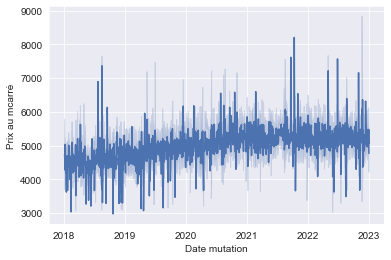

In [7]:
import seaborn as sns
df_bp = df[df['Prix au mcarré'] < 20000]
sns.set({'figure.figsize':(25,10)})
sns.lineplot(x="Date mutation", y="Prix au mcarré",data=df.sort_values('Date mutation'))

Les tendances de l'évolution du prix au mètre carré et la quantité de valeurs extrêmes observées confirment notre analyse et pour les prévisions futures. Le nouveau boxplot confirme cette tendance avec des écarts beaucoup plus faibles.


## Corrélations

La matrice de corrélation regroupe les corrélations de plusieurs variables entre elles, les coefficients indiquant l'influence que les variables ont les unes sur les autres.  
Pour cette partie, nous avons créé à partir de la base de données initiale un sous-tableau contenant les variables quantitatives.  
Le but de cette étape est d'avoir une vue d'ensemble des liens entre nos fonctionnalités et notre cible.  
On remarque que la valeur du bien est positivement et fortement corrélée au nombre de pièces principales et à la surface de la maison.  
On observe cependant une faible corrélation de la variable avec le code postal bien que les deux variables en question ne sont pas quantifiables, ce qui pourrait expliquer cet effet.Dans tous les cas, ils seront encodés dans la partie machine learning.





C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\2377523907.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



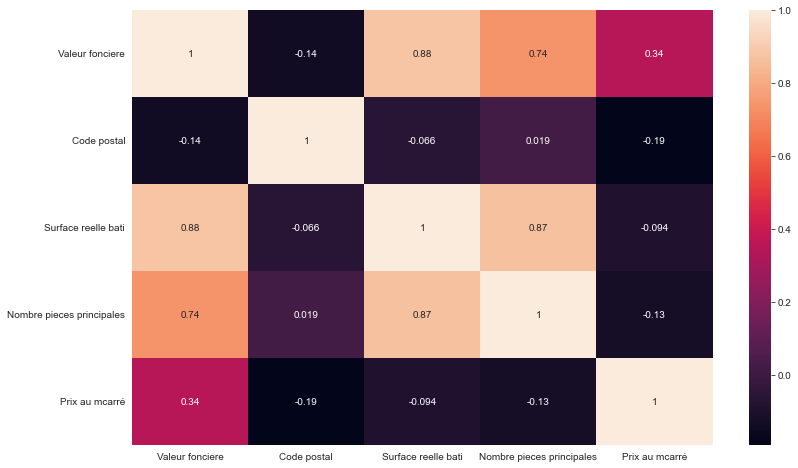

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df =df.corr(method='pearson')
plt.figure(figsize=(13, 8))
#plt.matshow(corr_df)
sns.heatmap(corr_df, annot=True)
plt.show()

## Encodage de la nouvelle base de données 
Pour cette deuxième partie, de nombreux tests de régression seront effectués pour optimiser la prédiction.  
En effet, plusieurs caractéristiques de notre jeu de données n'ont pas été quantifiées. Cependant, bien que les modèles de classification ne soient pas sensibles à l'ordre d'importance, c'est le cas des modèles de régression.  
C'est pourquoi nous avons dû encoder les variables 'Type de local' et 'Code postal' en variables catégorielles.



In [9]:
df_ml=df.copy()

def quant_loge(dfds):
  dfds['Appartement']=0
  dfds['Maison']=0
  for i in dfds.index:
    if dfds['Type local'][i]=='Appartement':
      dfds['Appartement'][i]=1
  else :
    dfds['Maison'][i]=1
  dfds.drop(['Type local'],axis=1,inplace=True)
  return dfds
  
def quant_lieu(dfds):
  dfds['premier']=0
  dfds['deuxieme']=0
  dfds['troisieme']=0
  dfds['quatrieme']=0
  dfds['cinquieme']=0
  dfds['sixieme']=0
  dfds['septieme']=0
  dfds['huitieme']=0
  dfds['neuvieme']=0
  for i in dfds.index:
    if dfds['Code postal'][i]==69001:
      dfds['premier'][i]=1
    elif dfds['Code postal'][i]==69002:
      dfds['deuxieme'][i]=1
    elif dfds['Code postal'][i]==69003:
        dfds['troisieme'][i]=1
    elif dfds['Code postal'][i]==69004:
      dfds['quatrieme'][i]=1
    elif dfds['Code postal'][i]==69005:
      dfds['cinquieme'][i]=1
    elif dfds['Code postal'][i]==69006:
      dfds['sixieme'][i]=1
    elif dfds['Code postal'][i]==69007:
      dfds['septieme'][i]=1
    elif dfds['Code postal'][i]==69008:
      dfds['huitieme'][i]=1
    elif dfds['Code postal'][i]==69009:
      dfds['neuvieme'][i]=1
  dfds.drop(['Code postal'],axis=1,inplace=True)
  return dfds

quant_loge(df_ml)
quant_lieu(df_ml)

C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\202692193.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\202692193.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\202692193.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sabri\AppData\Local\Temp\ipykernel_14744\202692193.py:32: SettingWithCopyWarning:


A value 

Date mutation Nature mutation  Valeur fonciere    Commune  \
2451604    2022-01-06           Vente           646800  LYON 5EME   
2451609    2022-01-03           Vente           660000  LYON 4EME   
2451616    2022-01-06           Vente           299000   LYON 1ER   
2451631    2022-01-10           Vente           311000  LYON 9EME   
2451633    2022-01-11           Vente           130000  LYON 5EME   
...               ...             ...              ...        ...   
2238154    2018-12-28           Vente           885000  LYON 6EME   
2238155    2018-12-28           Vente           885000  LYON 6EME   
2238157    2018-05-23           Vente           625000  LYON 3EME   
2238158    2018-12-28           Vente            98000  LYON 6EME   
2238172    2018-07-17           Vente           124000  LYON 7EME   

         Surface reelle bati  Nombre pieces principales  year  Prix au mcarré  \
2451604                 98.0                        4.0  2022     6600.000000   
2451609                120.0                        5.0  2022     5500.000000   
2451616                 64.0                        3.0  2022     4671.875000   
2451631                 58.0                        3.0  2022     5362.068966   
2451633                 35.0                        1.0  2022     3714.285714   
...                      ...                        ...   ...             ...   
2238154                169.0                        6.0  2018     5236.686391   
2238155                140.0                        5.0  2018     6321.428571   
2238157                 90.0                        4.0  2018     6944.444444   
2238158                 30.0                        1.0  2018     3266.666667   
2238172                 28.0                        1.0  2018     4428.571429   

         Appartement  Maison  premier  deuxieme  troisieme  quatrieme  \
2451604            1       0        0         0          0          0   
2451609            1       0        0         0          0          1   
2451616            1       0        1         0          0          0   
2451631            1       0        0         0          0          0   
2451633            1       0        0         0          0          0   
...              ...     ...      ...       ...        ...        ...   
2238154            1       0        0         0          0          0   
2238155            1       0        0         0          0          0   
2238157            0       0        0         0          1          0   
2238158            1       0        0         0          0          0   
2238172            1       1        0         0          0          0   

         cinquieme  sixieme  septieme  huitieme  neuvieme  
2451604          1        0         0         0         0  
2451609          0        0         0         0         0  
2451616          0        0         0         0         0  
2451631          0        0         0         0         1  
2451633          1        0         0         0         0  
...            ...      ...       ...       ...       ...  
2238154          0        1         0         0         0  
2238155          0        1         0         0         0  
2238157          0        0         0         0         0  
2238158          0        1         0         0         0  
2238172          0        0         1         0         0  

[37340 rows x 19 columns]

Pour résumer l'application :  

• On initialise les nouvelles variables [1er,2ème..9ème] pour les arrondissements et ['Appartement','Maison'] pour les types de local avec 0  
• L'algorithme parcourt chaque cellule des variables 'Type local'/'Code postal' et affecte la valeur 1 dans la colonne correspondante.
• Enfin nous supprimons les variables qui ont servi à l'encodage de notre table.


### Machine Learning pour la régression

L'apprentissage automatique est une discipline de l'intelligence artificielle qui utilise les mathématiques, 
en particulier les statistiques, pour permettre aux ordinateurs de résoudre des tâches sans être explicitement programmés.  
Dans notre approche d'apprentissage supervisé, nous utiliserons des techniques de régression et non des techniques de classification car le résultat de l'analyse prédictive n'appartiendra pas  à un intervalle discret de valeurs.  
Nous allons donc entraîner notre modèle sur une partie des données puis l'évaluer sur l'autre partie. En 
effet, si le modèle est évalué sur ses données d'apprentissage, il sera biaisé car il est efficace pour toutes les valeurs testées.  
La technique peut être adaptée si les données ne sont pas limitées car dans cette situation,les données manquantes et l'overfitting peuvent fortement biaiser le résultat.
En revanche, si l'ensemble de données est grand et que la distribution est égale entre les deux échantillons, cette approche est tout à fait appropriée. 

 


### Explication du processus 

Chaque régression suivra le même ordre d'étapes :  
• nous importons le package et la classe liés à la régression.  
• Ensuite, nous définissons les données x et y sur lesquelles le modèle va fonctionner et s'exécuter.  
• Nous effectuons la décomposition de manière aléatoire grâce à la méthode Train Test Split (En général, nous réservons 70% à 80% du jeu de données pour l'entraînement. )  
• Nous formons "X_Train" et "y_Train" sur notre jeu de données en utilisant la méthode fit()  
• Nous calculons ensuite la précision du modèle à l'aide de la méthode score(). Le résultat obtenu par cette méthode est également le coefficient de détermination (R²).  
Enfin, nous faisons une prédiction en appelant la méthode predict() appliquée sur notre modèle.  


In [10]:
#LONGEUR DE DF
len(df_ml)

37340

#### Choisir le bon estimateur 

Souvent, la partie la plus difficile de la résolution d'un problème d'apprentissage automatique consiste à 
trouver le bon estimateur pour le travail. Différents estimateurs conviennent à différents types de données et de problèmes.
Pour rappel:  
• La technique utilisée est une source d'apprentissage supervisé  
• Notre base de données contient près de 37 000 lignes de données  
• La métrique à estimer est quantitative  
• Notre modèle présente des caractéristiques codées.


#### Premières régressions
 
La régression linéaire est l'un des principaux modèles à aborder en Machine Learning. C'est l'une des 
techniques les plus utilisées en apprentissage automatique et cela est principalement dû à sa simplicité et 
à la facilité d'interprétation de ses résultats.

In [11]:
#valeurs non numériques de df_ml
df_ml.select_dtypes(exclude=['int64', 'float64']).columns

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'Commune',
       'year'],
      dtype='object')

In [12]:
from sklearn.linear_model import LinearRegression
import math as mt
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y=df_ml['Valeur fonciere']
#X= df_ml sans valeur non numériques
X=df_ml.drop(['Prix au mcarré','Valeur fonciere','Nature mutation','Date mutation','Commune'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr = LinearRegression()
regr.fit(X_train,y_train)
print('Linear regression score :',regr.score(X_test,y_test))
print('Coefficients:',regr.coef_)

Linear regression score : 0.8100873668275822
Coefficients: [ 4.80314893e+03 -3.54206745e+03  1.13165414e+04 -8.60485339e+04
  1.45519152e-11  1.75396981e+04  3.79216134e+04 -1.18323065e+04
  2.14102639e+04 -3.16083199e+04  5.94513465e+04 -1.51648067e+04
 -3.20609000e+04 -4.56565889e+04]


Le modèle décrit 82 % des variations du prix de l'immobilier. En observant la courbe de la valeur
foncière en fonction de la surface habitable, on observe des écarts de représentation plus importants pour les valeurs élevées.  
Dans l'ensemble, les signes des coefficients semblent être en accord avec la tendance attendue mais le coefficient lié à la variable "Nombre de pièces principales" est négatif, ce qui est en contradiction avec la logique des choses.
Nous avons donc effectué une nouvelle régression linéaire en appliquant une fonction logarithmique à ces deux variables afin de réduire ces écarts de modélisation, et donc d'améliorer la précision de la régression.



In [14]:
from sklearn.linear_model import LinearRegression
import math as mt
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y=df_ml['Valeur fonciere'].apply(mt.log)
#X= df_ml sans valeur non numériques
X=df_ml.drop(['Prix au mcarré','Valeur fonciere','Nature mutation','Date mutation','Commune'],axis=1)
#application de la log sur la colonne surface reelle bati
X['Surface reelle bati']=X['Surface reelle bati']#apply(mt.log)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr = LinearRegression()
regr.fit(X_train,y_train)
print('Linear log_regression score :',regr.score(X_test,y_test))
print('Coefficients:',regr.coef_)

Linear log_regression score : 0.7764226170513855
Coefficients: [ 0.01319945  0.0470085   0.03684692 -0.08412316  0.          0.06477401
  0.09933478 -0.02575684  0.06897686 -0.07735718  0.15235766 -0.05155761
 -0.10348764 -0.12728403]


On constate une meilleure cohérence des coefficients estimés, mais une perte de représentation au niveau du R²  pour la log-regression.

##### Limites 
Lors de l'application de modèles de régression, les valeurs aberrantes peuvent avoir un effet considérable sur la régression.
Il est possible dans certains cas de trouver des situations de sous-ajustement, lorsque le modèle
d'apprentissage automatique ne parvient pas à capturer correctement les données, ce qui estgénéralement le résultat d'une fonction d'hypothèse mal adaptée aux données.




#### Regression Lasso
La régression au lasso optimise le problème suivant :   
C'est une régression linéaire avec une contrainte linéaire sur les coefficients.
La solution n'est pas exprimée exactement et la résolution utilise une méthode basée sur le gradient. Il est préférable de normaliser pour obtenir de meilleurs résultats.




In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df_ml['Valeur fonciere']
X = df_ml.drop(['Prix au mcarré', 'Valeur fonciere', 'Nature mutation', 'Date mutation', 'Commune'], axis=1)

#Normalisation de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = linear_model.Lasso(alpha=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)
model.fit(X_train, y_train)

print('Regression Lasso score:', model.score(X_test, y_test))
print('Coefficients:', model.coef_)

Regression Lasso score: 0.8100873744195987
Coefficients: [ 1.45013467e+05 -4.39887279e+03  1.60403674e+04 -1.21817425e+04
  0.00000000e+00  8.18746744e+03  1.20596310e+04  1.44956079e+03
  9.86725387e+03 -4.25354771e+03  2.12441979e+04  7.48324544e+01
 -5.82853809e+03 -8.35500325e+03]


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.328e+12, tolerance: 7.833e+10



#### Ridge régression 

La régression Ridge est basée sur le principe de la régression au lasso. Elle permet de réduire lesvariances dans un modèle d'apprentissage automatique qui contient de nombreuses variances. Il est également préférable de la normaliser.


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df_ml['Valeur fonciere']
X = df_ml.drop(['Prix au mcarré', 'Valeur fonciere', 'Nature mutation', 'Date mutation', 'Commune'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = Ridge(alpha=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)
model.fit(X_train, y_train)

print('Ridge Regression score:', model.score(X_test, y_test))
print('Coefficients:', model.coef_)

Ridge Regression score: 0.8100873369151267
Coefficients: [ 1.45011973e+05 -4.39768602e+03  1.60404070e+04 -1.21818846e+04
  1.81627784e-20  5.69171532e+03  9.78996900e+03 -2.67891541e+03
  7.17608931e+03 -6.87742965e+03  1.83967069e+04 -3.91967085e+03
 -9.32654400e+03 -1.11196126e+04]


### Choix définitif

Nous avons choisi d'effectuer nos prédictions avec le Ridge regressor pour les raisons suivantes:  
• il n'était pas sensible à la normalisation qui est une étape de traitement importante en ML 
• ses coefficients sont en adéquation avec les attentes.  
• le modèle n'est soumis à aucune contrainte sur les hypothèses.  
• Il conserve son efficacité après normalisation  
  
Note:   

Comme mentionné précédemment, le régresseur Ridge a été utilisé car il présentait le plus d'avantages par rapport à notre modèle. Cependant, il faut noter un écart sur le coefficient 'année' par rapport à ce qui était attendu. Malgré les modifications des paramètres alpha, nous n'avons pas réussi à résoudre ce problème car il occasionnait des pertes de précision sur le modèle.



## Réponse au problème client 

Nous allons maintenant mettre en place grâce à toutes les démarches effectuées précédemment quelques premiers éléments de réponse.  
  
1) Est-il plus rentable d'investir dans une maison ou un appartement ?  




In [ ]:
df.head()

Numero transaction Date mutation Nature mutation  Valeur fonciere  \
0              3126323    2021-01-05           Vente           375000   
6              3126336    2021-01-08           Vente           635150   
7              3126343    2021-01-06           Vente           470400   
8              3126345    2021-01-08           Vente           391000   
10             3126349    2021-01-05           Vente           500000   

      Commune  Surface reelle bati  Nombre pieces principales  year  \
0   LYON 5EME                108.0                        5.0  2021   
6   LYON 5EME                127.0                        5.0  2021   
7    LYON 1ER                 72.0                        3.0  2021   
8    LYON 1ER                 61.0                        2.0  2021   
10  LYON 2EME                 80.0                        3.0  2021   

    Prix au mcarré  Appartement  Maison  premier  deuxieme  troisieme  \
0      3472.222222            1       0        0         0          0   
6      5001.181102            1       0        0         0          0   
7      6533.333333            1       0        1         0          0   
8      6409.836066            1       0        1         0          0   
10     6250.000000            1       0        0         1          0   

    quatrieme  cinquieme  sixieme  septieme  huitieme  neuvieme  
0           0          1        0         0         0         0  
6           0          1        0         0         0         0  
7           0          0        0         0         0         0  
8           0          0        0         0         0         0  
10          0          0        0         0         0         0

In [18]:
#Prix au m² des maisons
cdm=df[df['Type local'].isin(['Maison'])]
cdm=cdm.groupby(['Code postal'])['Prix au mcarré'].mean().sort_values()
cdm=pd.DataFrame(cdm)
cdm.rename({'Prix au mcarré':'prix m² maison'},axis=1,inplace=True)
cdm.index=cdm.index-69000
#trier par code postal
cdm=cdm.sort_index()
cdm

prix m² maison
Code postal                
1               5234.515733
3               6012.953667
4               6210.841093
5               5775.176826
6               4556.153846
7               5415.451928
8               5188.643914
9               5290.982939

In [19]:
#Prix au m² des appartements
cdap=df[df['Type local'].isin(['Appartement'])]
cdap=cdap.groupby(['Code postal'])['Prix au mcarré'].mean().sort_values()
cdap=pd.DataFrame(cdap)
cdap.rename({'Prix au mcarré':'prix m² appart'},axis=1,inplace=True)
cdap.index=cdap.index-69000
cdap=cdap.sort_index()
cdap

prix m² appart
Code postal                
1               5518.558600
2               5762.394457
3               4878.080839
4               5393.787442
5               4660.699354
6               5848.593429
7               4880.077519
8               4611.982546
9               4420.716745

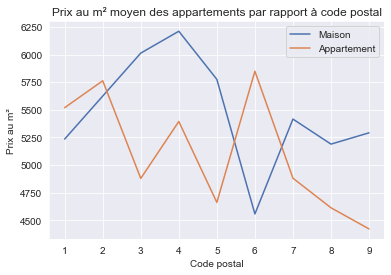

In [20]:
#courbe des prix au m² moyen  des maisons par rapport à code postal
plt.plot(cdm)
plt.xlabel('Code postal')
plt.ylabel('Prix au m²')
plt.title('Prix au m² moyen des maisons par rapport à code postal')
#courbe des prix au m² moyen  des appartements par rapport à code postal sur le même graphique
plt.plot(cdap)
plt.xlabel('Code postal')
plt.ylabel('Prix au m²')
plt.title('Prix au m² moyen des appartements par rapport à code postal')
plt.legend(['Maison','Appartement'])
#augmenter taille du graphique




Ainsi,si le client souhaite haibiter dans le 6 ème arrondissement, on lui conseillera d'habiter en maison tandis que s'il souhaite habituer dans le 4 ème ou le 8 ème,on lui conseillera d'habiter en appartement si son souhait est de minimiser son coût.

2)Comment observer les tendances d'évolution/baisse du prix de l'appartement
à Lyon 8e ou Lyon 9 depuis 2018?

<Axes: xlabel='Date mutation', ylabel='Prix au mcarré'>

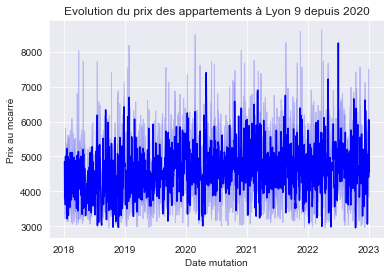

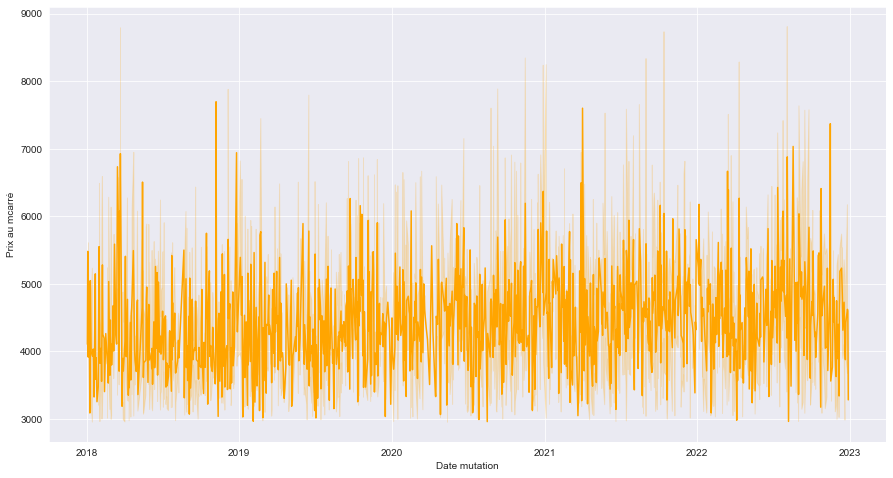

In [21]:

df_9 = df[df['Code postal'].isin([69009])]
df_8 = df[df['Code postal'].isin([69008])]
fig, axs = plt.subplots(ncols=1)
plt.title('Evolution du prix des appartements à Lyon 9 depuis 2020',)
sns.set({'figure.figsize':(15,8)})
sns.lineplot(x="Date mutation", y="Prix au mcarré",data=df_8.sort_values('Date mutation'),color='blue',linewidth=1.5)
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x="Date mutation", y="Prix au mcarré",data=df_9.sort_values('Date mutation'),color='orange',linewidth=1.5)

## Conclusion 


 Grâce à l'utilisation d'algorithmes d'apprentissage supervisé tels que la régression linéaire, la régression logistique ou la Ridge regression, nous avons pu exploiter un ensemble de données comprenant des informations sur les propriétés immobilières, telles que la localisation, la superficie, le nombre de pièces etc.

L'extraction de données nous à permis de constituer un dataset solide qui ont été intégrées à ns modèles d'apprentissage pour améliorer leur précision et leur capacité prédictive.
Ainsi,nos  modèles ont démontré de bonnes performances et ont été capable de capturer des relations entre les différentes caractéristiques des biens et leur prix de vente.

Les utilisateurs peuvent maintenant bénéficier d'un outil fiable pour estimer le prix de vente de leur propriété immobilière. Cela peut aider les vendeurs à fixer un prix compétitif et les acheteurs à prendre des décisions éclairées lors de l'achat d'une propriété.

Pour généraliser le tout,les différents déploiements nous ont permis:
-d'automatiser une méthode de récupération de données à partir d'une source du net
-trier les éléments indésirables  
-traiter les valeurs manquantes   
-corriger les éventuelles erreurs    
-orienter nos choix pour l'application   
-améliorer notre analyse de prédiction   
-apporter une première réponse à une problématique métier  
 Nous notons toutefois que ce projet peut être poussé encore plus loin (avec l'imputation de méthodes telles que la Validation Croisée, les pipelines de sélection...)

